In [1]:
from IPython.display import display, HTML
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
# Globals
columns_to_drop=['900793-annotations','World regions according to OWID']

In [3]:
# Function to read CSV file into a pandas DataFrame
def read_csv_into_dataframe(csv_path):
    df = pd.read_csv(csv_path)
    df = df.drop(columns=columns_to_drop, axis=1)
    return df


In [4]:
# Paths to the CSV files
co2_vs_gdp_csv_path = r'C:\Users\kowle\Projects\ClimateData\co2-emissions-vs-gdp/co2-emissions-vs-gdp.csv'
#local_csv_path = "/path/to/local/storage/local_read_results.csv"

# Read CSV files into pandas DataFrames
co2_vs_gdp_df = read_csv_into_dataframe(co2_vs_gdp_csv_path)
#local_dataframe = read_csv_into_dataframe(local_csv_path)

# Display the DataFrames (you can modify or process them as needed)
print("C02 versus GDP:")
print(co2_vs_gdp_df.head())



C02 versus GDP:
        Entity Code  Year  Annual CO₂ emissions (per capita)  GDP per capita  \
0  Afghanistan  AFG  1949                           0.001992             NaN   
1  Afghanistan  AFG  1950                           0.010837          1156.0   
2  Afghanistan  AFG  1951                           0.011625          1170.0   
3  Afghanistan  AFG  1952                           0.011468          1189.0   
4  Afghanistan  AFG  1953                           0.013123          1240.0   

   Population (historical)  
0                7356890.0  
1                7776182.0  
2                7879343.0  
3                7987783.0  
4                8096703.0  


In [5]:
# Clean the dataframes by dropping rows with NaN
co2_vs_gdp_df.dropna()

,Entity,Code,Year,Annual CO₂ emissions (per capita),GDP per capita,Population (historical)
1,Afghanistan,AFG,1950,0.010837,1156.0000,7776182.0
2,Afghanistan,AFG,1951,0.011625,1170.0000,7879343.0
3,Afghanistan,AFG,1952,0.011468,1189.0000,7987783.0
4,Afghanistan,AFG,1953,0.013123,1240.0000,8096703.0
5,Afghanistan,AFG,1954,0.012945,1245.0000,8207953.0
...,...,...,...,...,...,...
64423,Zimbabwe,ZWE,2018,0.745314,1900.1992,15034457.0
64424,Zimbabwe,ZWE,2019,0.672038,1753.0244,15271377.0
64425,Zimbabwe,ZWE,2020,0.547083,1585.9728,15526888.0
64426,Zimbabwe,ZWE,2021,0.645913,1687.2532,15797220.0


In [6]:
# new column to express the ratio of emissions to economic output, per capita
co2_vs_gdp_df['CO2_GDP_Ratio'] = co2_vs_gdp_df['Annual CO₂ emissions (per capita)'] / co2_vs_gdp_df['GDP per capita']

In [7]:
# filter to G20
g20_countries = [
    'Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 
    'Indonesia', 'Italy', 'Japan', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 
    'South Korea', 'Turkey', 'United Kingdom', 'United States'
]

g20_df = co2_vs_gdp_df[co2_vs_gdp_df['Entity'].isin(g20_countries)]

print("This is the list of G20 Nations")
print(g20_df['Entity'].unique())



This is the list of G20 Nations
['Argentina' 'Australia' 'Brazil' 'Canada' 'China' 'France' 'Germany'
 'India' 'Indonesia' 'Italy' 'Japan' 'Mexico' 'Russia' 'Saudi Arabia'
 'South Africa' 'South Korea' 'Turkey' 'United Kingdom' 'United States']


In [9]:
# Step 1: Further filter to create the list of G7 countries
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']

# Step 2: Filter the DataFrame for G7 countries
g7_df = g20_df[g20_df['Entity'].isin(g7_countries)]

# Step 3: Check the filtered DataFrame
print(g7_df['Entity'].unique())  # Verify that only G7 countries are included


['Canada' 'France' 'Germany' 'Italy' 'Japan' 'United Kingdom'
 'United States']


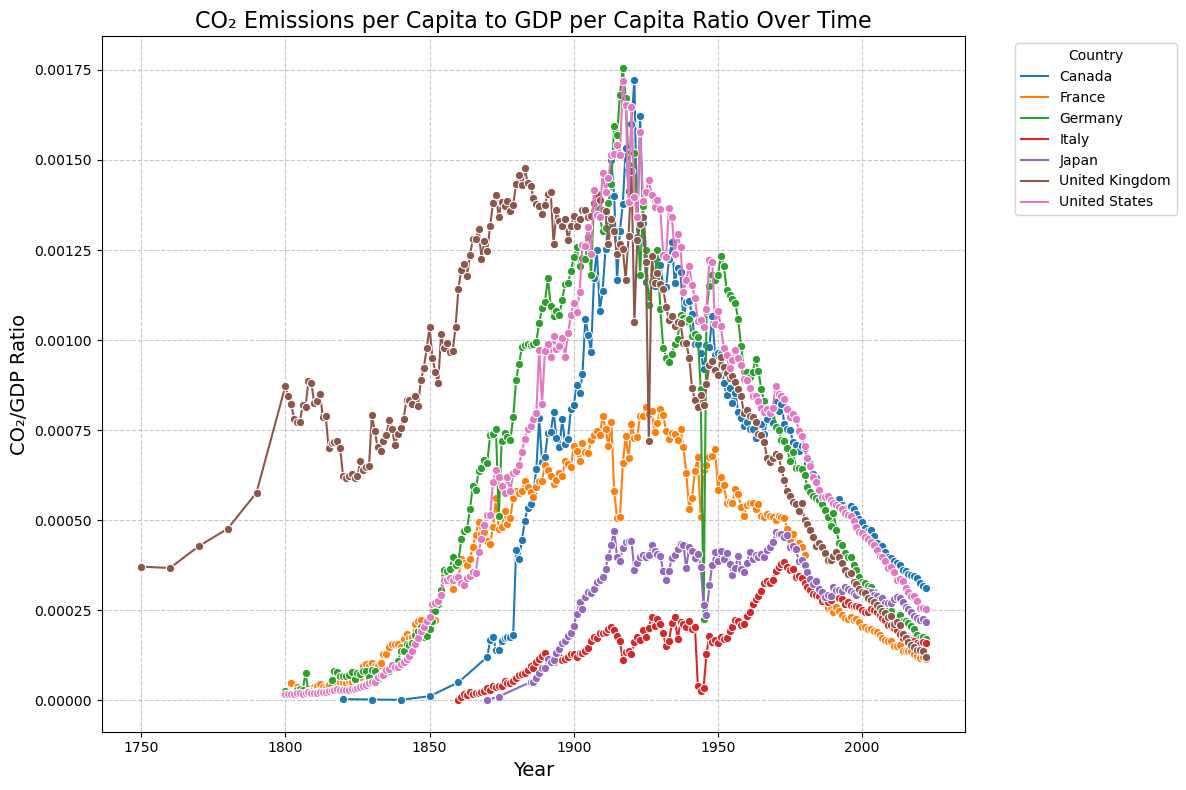

In [10]:
# Plot using seaborn
plt.figure(figsize=(12, 8))
sb.lineplot(
    data=g7_df,
    x='Year',
    y='CO2_GDP_Ratio',
    hue='Entity',  # Group by country
    marker='o'
)

# Add labels and title
plt.title("CO₂ Emissions per Capita to GDP per Capita Ratio Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO₂/GDP Ratio", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()